In [4]:
# import libraries

import pandas as pd
from pandas import set_option
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn import model_selection
import scipy as sy
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from collections import Counter

In [5]:
# read train_data files
train_data_2016 = pd.read_csv("C:/Users/Deepika Keswarap/Documents/projecta/all/train_2016_v2.csv")
# read train_data file
train_data_2017 = pd.read_csv("C:/Users/Deepika Keswarap/Documents/projecta/all/train_2017.csv")


# Read the properties files
properties2016 = pd.read_csv("C:/Users/Deepika Keswarap/Documents/projecta/all/properties_2016.csv")
# read train_data file
properties2017 = pd.read_csv("C:/Users/Deepika Keswarap/Documents/projecta/all/properties_2017.csv")


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
print ("Shape Of Train: ",train_data_2016.shape)
print ("Shape Of Properties: ",properties2016.shape)

print ("Shape Of Train: ",train_data_2017.shape)
print ("Shape Of Properties: ",properties2017.shape)

Shape Of Train:  (90275, 3)
Shape Of Properties:  (2985217, 58)
Shape Of Train:  (77613, 3)
Shape Of Properties:  (2985217, 58)


In [7]:
merged2016 = pd.merge(train_data_2016,properties2016,on="parcelid",how="left")
merged2017 = pd.merge(train_data_2017,properties2017,on="parcelid",how="left")

print ("Shape Of Merged2016: ",merged2016.shape)
print ("Shape Of Merged2017: ",merged2017.shape)

Shape Of Merged2016:  (90275, 60)
Shape Of Merged2017:  (77613, 60)


In [8]:
merged2016.to_csv("C:/Users/Deepika Keswarap/Documents/projecta/all/merged2016.csv", index=False, encoding='utf8')
merged2017.to_csv("C:/Users/Deepika Keswarap/Documents/projecta/all/merged2017.csv", index=False, encoding='utf8')

In [9]:
#print("Count NA values in  Merged2016: ",merged2016.count(axis='columns'))
#print("Count NA values in  Merged2017: ",merged2017.count(axis='columns'))   
print("Number of rows with atleast one null value",sum(merged2016.count(axis=1) < len(merged2016.columns)))
print("Number of rows with atleast one null value",sum(merged2017.count(axis=1) < len(merged2016.columns)))

Number of rows with atleast one null value 90275
Number of rows with atleast one null value 77613


In [10]:
merged2016.columns

Index(['parcelid', 'logerror', 'transactiondate', 'airconditioningtypeid',
       'architecturalstyletypeid', 'basementsqft', 'bathroomcnt', 'bedroomcnt',
       'buildingclasstypeid', 'buildingqualitytypeid', 'calculatedbathnbr',
       'decktypeid', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcn

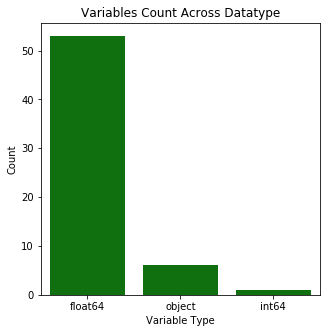

In [11]:
dataTypeDf = pd.DataFrame(merged2016.dtypes.value_counts()).reset_index().rename(columns={"index":"variableType",0:"count"})
fig,ax = plt.subplots()
fig.set_size_inches(5,5)
g = sns.barplot(data=dataTypeDf,x="variableType",y="count",ax=ax,color="green")
ax.set(xlabel='Variable Type', ylabel='Count',title="Variables Count Across Datatype")

plt.show()




In [12]:
x = dataTypeDf["variableType"].tolist()
print(x)
y = dataTypeDf["count"].tolist()
print(y)

[dtype('float64'), dtype('O'), dtype('int64')]
[53, 6, 1]


There are 53 float, 6 object and 1 int datatatypes. 
We would think float, int would be numberical and object types would be categorical. However that is not always the case.
This dataset has a lot of categorical variables hidden in float and int datatypes.eg:airconditioningtypeid, regionidzip
Hence we manually separated the categorical variables. 

In [13]:
categorical_var = ['parcelid','transactiondate','airconditioningtypeid','architecturalstyletypeid','buildingclasstypeid',
                  'buildingqualitytypeid','decktypeid','fips','hashottuborspa','heatingorsystemtypeid','latitude',
                  'longitude','pooltypeid10','pooltypeid2','pooltypeid7','propertycountylandusecode','propertylandusetypeid',
                  'propertyzoningdesc','rawcensustractandblock','regionidcity','regionidcounty','regionidneighborhood',
                  'regionidzip','storytypeid','typeconstructiontypeid','yearbuilt','fireplaceflag','assessmentyear'
                  ,'taxdelinquencyflag','taxdelinquencyyear','censustractandblock']

clean_cat_var = ['transactiondate','airconditioningtypeid','architecturalstyletypeid','buildingclasstypeid',
                  'buildingqualitytypeid','decktypeid','fips','hashottuborspa','heatingorsystemtypeid','latitude',
                  'longitude','pooltypeid10','pooltypeid2','pooltypeid7','propertycountylandusecode','propertylandusetypeid',
                  'propertyzoningdesc','rawcensustractandblock','regionidcity','regionidcounty','regionidneighborhood',
                  'regionidzip','storytypeid','typeconstructiontypeid','yearbuilt','fireplaceflag','assessmentyear'
                  ,'taxdelinquencyflag','taxdelinquencyyear','censustractandblock']

numerical_var = ['logerror','basementsqft','bathroomcnt','bedroomcnt','calculatedbathnbr','finishedfloor1squarefeet',
                'calculatedfinishedsquarefeet','finishedsquarefeet12','finishedsquarefeet13','finishedsquarefeet15',
                'finishedsquarefeet50','finishedsquarefeet6','fireplacecnt','fullbathcnt','garagecarcnt','garagetotalsqft'
                ,'lotsizesquarefeet','poolcnt','poolsizesum','roomcnt','threequarterbathnbr','unitcnt','yardbuildingsqft17',
                'yardbuildingsqft26','numberofstories','structuretaxvaluedollarcnt','taxvaluedollarcnt','landtaxvaluedollarcnt',
                'taxamount']

31 categorical and 29 numerical variables.
parcelid is the unique id for a record. Hence it shouldn't go into the model.
Target variable - logerror

In [18]:
# find out cardinality - number of categories in the variable

cardinalities = list();

for i in range(len(clean_cat_var)): 
    cou = merged2016[clean_cat_var[i]].value_counts().unique().size
    cardinalities.append(cou)
    print(clean_cat_var[i],cou)

transactiondate 227
airconditioningtypeid 5
architecturalstyletypeid 6
buildingclasstypeid 1
buildingqualitytypeid 8
decktypeid 1
fips 3
hashottuborspa 1
heatingorsystemtypeid 10
latitude 31
longitude 63
pooltypeid10 1
pooltypeid2 1
pooltypeid7 1
propertycountylandusecode 43
propertylandusetypeid 14
propertyzoningdesc 176
rawcensustractandblock 48
regionidcity 157
regionidcounty 3
regionidneighborhood 169
regionidzip 268
storytypeid 1
typeconstructiontypeid 3
yearbuilt 123
fireplaceflag 1
assessmentyear 1
taxdelinquencyflag 1
taxdelinquencyyear 11
censustractandblock 44


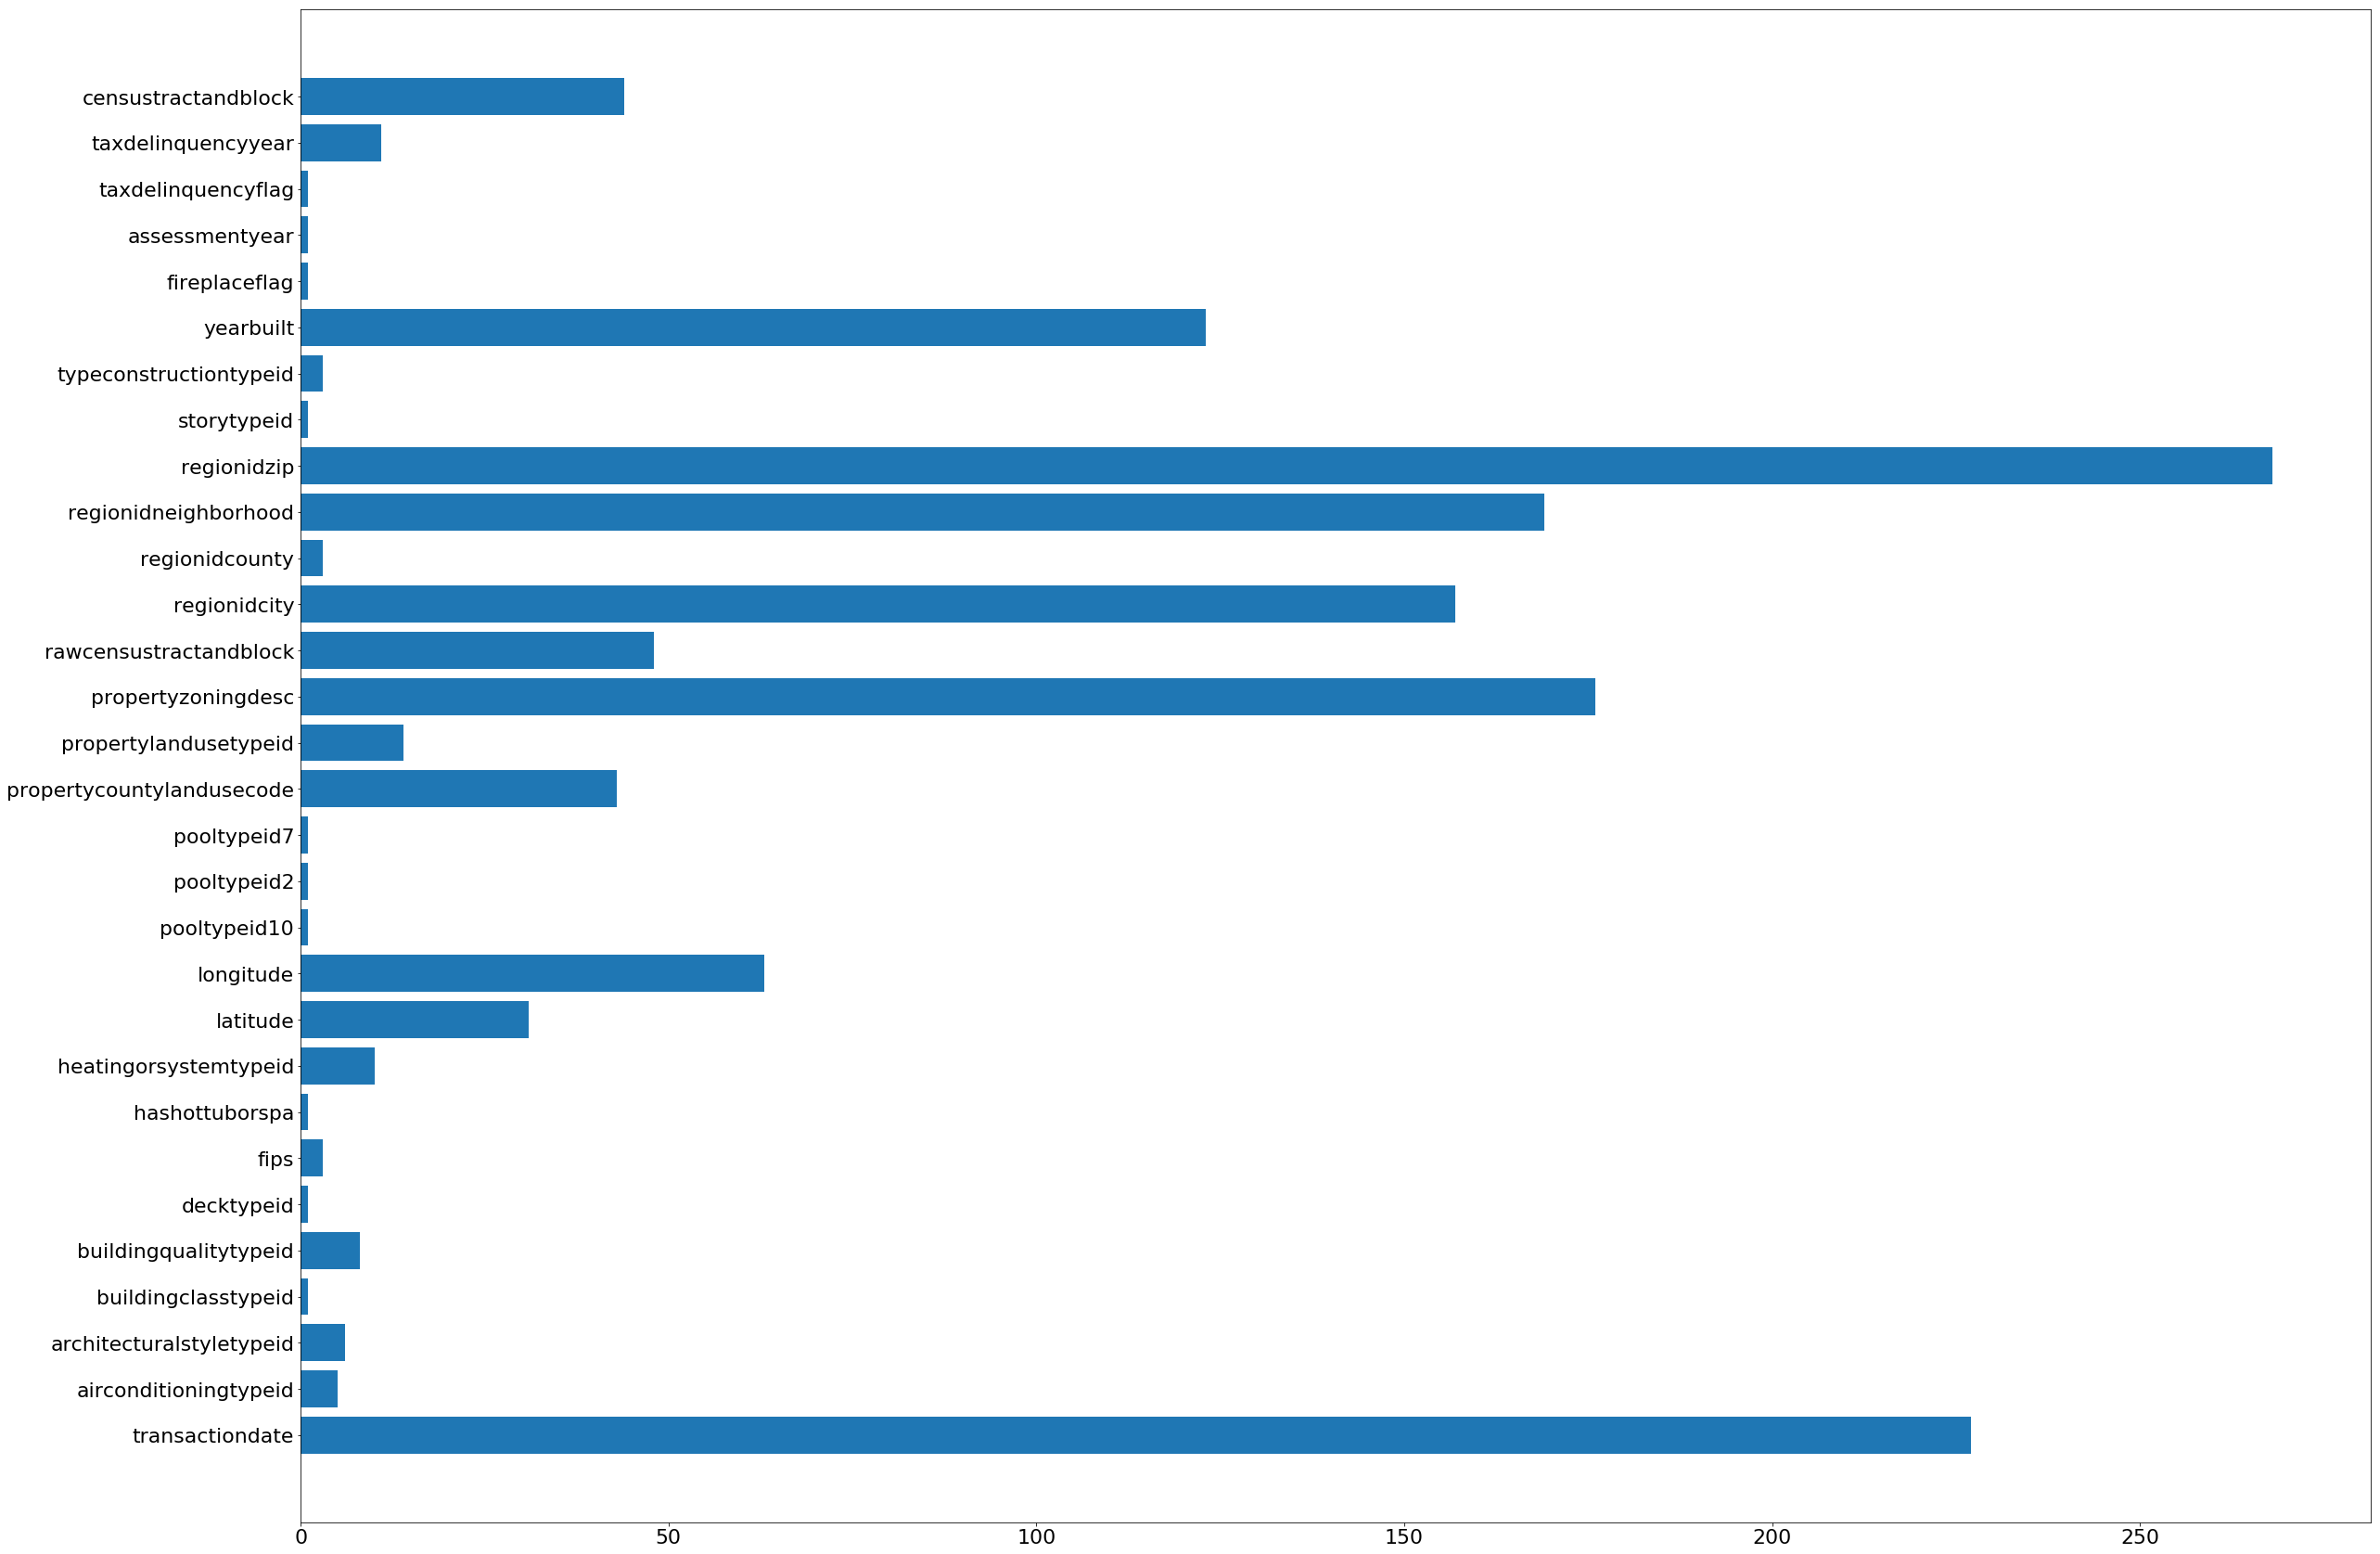

In [19]:
plt.rcParams.update({'font.size': 22})

height =  clean_cat_var
bars = cardinalities
#y_pos = np.arange(len(bars))
plt.figure(figsize=(40,30))   
# Create bars
plt.barh( height,bars)
# Show graphic
plt.show()

1) Transaction date - converted to quarters and months
2) Year built - age of house - (2018-yearbuilt)
4) taxdelinquencyyear = (2018-taxdelinquencyyear)
3) rawcensustractandblock and censustractandblock has the same data description. censustractandblock is missing 0.6%(605 rows) of the information while rawcensustractandblock has no missing values. The actual values in both of these columns are different.
The correlation for the columns is 0.99. So, we dropped censustractandblock.
4) propertylandusetypeid, propertyzoningdesc - are similar according to data description - one is a description of the allowed land use and other is type of the allowed land use. Lets use the id and drop the description. Also, the id has 14 cardinalities compared to 176 for the description.
propertycountylandusecode - discard
5) regionidcity, regionidcounty, regionidzip, regionidneighborhood, latitude, longitude - k- means for zip and one hot for regionidcounty. drop rest
6) buildingclasstypeid, decktypeid, poolcnt, pooltypeid10, pooltypeid2, pooltypeid7, storytypeid, and assessmentyear is positively correlated with all variables so we can remove all of them.
7) hashottuborspa, taxdelinquencyflag, fireplaceflag - 0/1
8) typeconstructiontypeid, buildingqualitytypeid,fips,heatingorsystemtypeid,airconditioningtypeid, architecturalstyletypeid - dummies

In [16]:
merged2016['rawcensustractandblock'].equals(merged2016['censustractandblock'])

False

In [17]:
merged2016['censustractandblock'].corr(merged2016['rawcensustractandblock'])

0.9998219419915643

In [20]:
# 1) Transaction date - converted to quarters and months
merged2016['transaction_mon'] = pd.DatetimeIndex(merged2016['transactiondate']).month
    
merged2016.transaction_mon[merged2016.transaction_mon == 2] = 1   
merged2016.transaction_mon[merged2016.transaction_mon == 3] = 1 
merged2016.transaction_mon[merged2016.transaction_mon == 4] = 2
merged2016.transaction_mon[merged2016.transaction_mon == 5] = 2
merged2016.transaction_mon[merged2016.transaction_mon == 6] = 2
merged2016.transaction_mon[merged2016.transaction_mon == 7] = 3
merged2016.transaction_mon[merged2016.transaction_mon == 8] = 3
merged2016.transaction_mon[merged2016.transaction_mon == 9] = 3
merged2016.transaction_mon[merged2016.transaction_mon == 10] = 4
merged2016.transaction_mon[merged2016.transaction_mon == 11] = 4
merged2016.transaction_mon[merged2016.transaction_mon == 12] = 4

merged2016.rename(columns={'transaction_mon': 'transaction_quarter'}, inplace=True)
merged2016['transaction_mon'] = pd.DatetimeIndex(merged2016['transactiondate']).month

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is t

In [21]:
# 1) Transaction date - converted to quarters and months
merged2017['transaction_mon'] = pd.DatetimeIndex(merged2017['transactiondate']).month
    
merged2017.transaction_mon[merged2017.transaction_mon == 2] = 1   
merged2017.transaction_mon[merged2017.transaction_mon == 3] = 1 
merged2017.transaction_mon[merged2017.transaction_mon == 4] = 2
merged2017.transaction_mon[merged2017.transaction_mon == 5] = 2
merged2017.transaction_mon[merged2017.transaction_mon == 6] = 2
merged2017.transaction_mon[merged2017.transaction_mon == 7] = 3
merged2017.transaction_mon[merged2017.transaction_mon == 8] = 3
merged2017.transaction_mon[merged2017.transaction_mon == 9] = 3
merged2017.transaction_mon[merged2017.transaction_mon == 10] = 4
merged2017.transaction_mon[merged2017.transaction_mon == 11] = 4
merged2017.transaction_mon[merged2017.transaction_mon == 12] = 4

merged2017.rename(columns={'transaction_mon': 'transaction_quarter'}, inplace=True)
merged2017['transaction_mon'] = pd.DatetimeIndex(merged2017['transactiondate']).month

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is t

In [22]:
merged2016 =merged2016.drop('transactiondate',axis=1)
merged2017 =merged2017.drop('transactiondate',axis=1)

In [23]:
#Year built - age of house - (2018-yearbuilt)
#taxdelinquencyyear = (2018-taxdelinquencyyear)
merged2016['age'] = 2018 - merged2016['yearbuilt']
merged2017['age'] = 2018 - merged2017['yearbuilt']
merged2016['yearssincetaxdeliquency'] = 2018 - merged2016['taxdelinquencyyear']
merged2017['yearssincetaxdeliquency'] = 2018 - merged2017['taxdelinquencyyear']

In [24]:
merged2016 =merged2016.drop(['yearbuilt','taxdelinquencyyear','parcelid'],axis=1)
merged2017 =merged2017.drop(['yearbuilt','taxdelinquencyyear','parcelid'],axis=1)

In [25]:
#rawcensustractandblock and censustractandblock has the same data description. censustractandblock is missing 0.6%(605 rows) of the information while rawcensustractandblock has no missing values. The actual values in both of these columns are different.
#The correlation for the columns is 0.99. So, we dropped censustractandblock.
merged2016 =merged2016.drop('censustractandblock',axis=1)
merged2017 =merged2017.drop('censustractandblock',axis=1)

In [26]:
#propertylandusetypeid, propertyzoningdesc - are similar according to data description - 
#one is a description of the allowed land use and other is type of the allowed land use. 
#Lets use the id and drop the description. Also, the id has 14 cardinalities compared to 176 for the description.
merged2016 =merged2016.drop('propertyzoningdesc',axis=1)
merged2017 =merged2017.drop('propertyzoningdesc',axis=1)

In [27]:
#propertycountylandusecode - keep/tbd drop for now
merged2016 =pd.get_dummies(merged2016, columns=["propertylandusetypeid"], prefix="propertylandusetypeid")
merged2017 =pd.get_dummies(merged2017, columns=["propertylandusetypeid"], prefix="propertylandusetypeid") 

In [28]:
#regionidcity, regionidcounty, regionidzip, regionidneighborhood, latitude, longitude - 
#k- means for zip and one hot for regionidcounty. drop rest

#http://pbpython.com/categorical-encoding.html

merged2016 =pd.get_dummies(merged2016, columns=["regionidcounty"], prefix="county")
merged2017 =pd.get_dummies(merged2017, columns=["regionidcounty"], prefix="county") 
#merged2016.rename(columns={'county_1286.0': 'venturacounty'}, inplace=True)
#merged2016.rename(columns={'county_2061.0': 'venturacounty'}, inplace=True)
#merged2016.rename(columns={'county_3101.0': 'venturacounty'}, inplace=True)

In [29]:
#buildingclasstypeid, decktypeid, poolcnt, pooltypeid10, pooltypeid2, pooltypeid7, storytypeid, and assessmentyear 
#are highly correlated with all variables so we can remove all of them.
merged2016 =merged2016.drop(['buildingclasstypeid','decktypeid','poolcnt','pooltypeid10','pooltypeid2','pooltypeid2'
                            ,'storytypeid','assessmentyear'],axis=1)
merged2017 =merged2017.drop(['buildingclasstypeid','decktypeid','poolcnt','pooltypeid10','pooltypeid2','pooltypeid2'
                            ,'storytypeid','assessmentyear'],axis=1)

In [30]:
#hashottuborspa, taxdelinquencyflag, fireplaceflag - 0/1

merged2016['hashottuborspa']=merged2016['hashottuborspa'].fillna(0)
merged2016['taxdelinquencyflag']=merged2016['taxdelinquencyflag'].fillna(0)
merged2016['fireplaceflag']=merged2016['fireplaceflag'].fillna(0)

merged2017['hashottuborspa']=merged2017['hashottuborspa'].fillna(0)
merged2017['taxdelinquencyflag']=merged2017['taxdelinquencyflag'].fillna(0)
merged2017['fireplaceflag']=merged2017['fireplaceflag'].fillna(0)



In [31]:
 #typeconstructiontypeid, buildingqualitytypeid,fips,heatingorsystemtypeid,airconditioningtypeid, architecturalstyletypeid - 
    #dummies
merged2016 =pd.get_dummies(merged2016, columns=["typeconstructiontypeid"], prefix=["Constructiontype"])
merged2017 =pd.get_dummies(merged2017, columns=["typeconstructiontypeid"], prefix=["Constructiontype"])    

merged2016 =pd.get_dummies(merged2016, columns=["buildingqualitytypeid"], prefix=["Buildingqualitytype"])
merged2017 =pd.get_dummies(merged2017, columns=["buildingqualitytypeid"], prefix=["Buildingqualitytype"]) 

merged2016 =pd.get_dummies(merged2016, columns=["fips"], prefix=["fips"])
merged2017 =pd.get_dummies(merged2017, columns=["fips"], prefix=["fips"]) 

merged2016 =pd.get_dummies(merged2016, columns=["heatingorsystemtypeid"], prefix=["heatingorsystemtypeid"])
merged2017 =pd.get_dummies(merged2017, columns=["heatingorsystemtypeid"], prefix=["heatingorsystemtypeid"])

merged2016 =pd.get_dummies(merged2016, columns=["airconditioningtypeid"], prefix=["airconditioningtypeid"])
merged2017 =pd.get_dummies(merged2017, columns=["airconditioningtypeid"], prefix=["airconditioningtypeid"]) 
    
merged2016 =pd.get_dummies(merged2016, columns=["architecturalstyletypeid"], prefix=["architecturalstyletypeid"])
merged2017 =pd.get_dummies(merged2017, columns=["architecturalstyletypeid"], prefix=["architecturalstyletypeid"])     

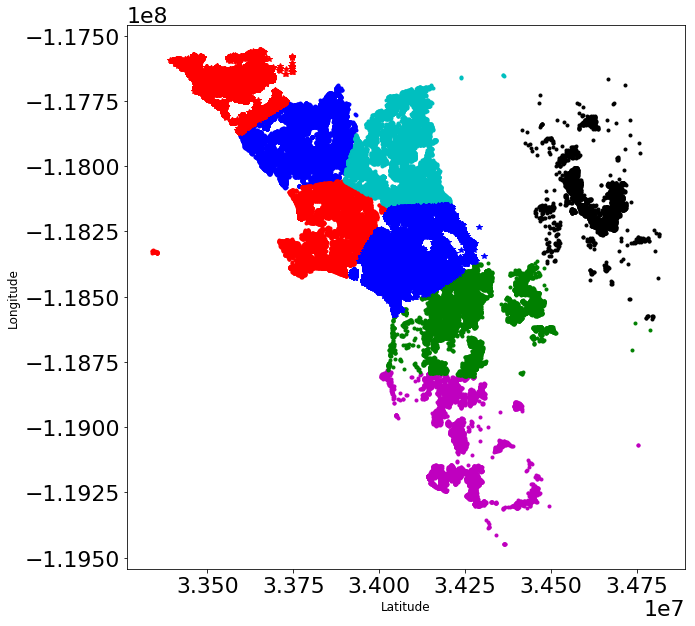

[    1     4     8 ... 90200 90209 90256]


In [32]:
#k- means for lt and long
merged2016.dropna(axis=0,how='any',subset=['latitude','longitude'],inplace=True)
X=merged2016.loc[:,['latitude','longitude']]


#run KMeans
kmeans = KMeans(n_clusters=8, random_state=0).fit(X)
id_label=kmeans.labels_

#plot result
ptsymb = np.array(['b.','r.','m.','g.','c.','k.','b*','r*','m*','r^']);
plt.figure(figsize=(10,10))
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
for i in range(8):
    cluster=np.where(id_label==i)[0]
    plt.plot(X.latitude[cluster].values,X.longitude[cluster].values,ptsymb[i])
plt.show()
print(cluster)

In [33]:
merged2016 = merged2016.drop(['latitude','longitude','propertycountylandusecode','regionidcity','regionidneighborhood',
                            'regionidzip' ],axis = 1)
merged2017 = merged2017.drop(['latitude','longitude','propertycountylandusecode','regionidcity','regionidneighborhood',
                            'regionidzip' ],axis = 1)

In [34]:
merged2016.describe()

,logerror,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,...,airconditioningtypeid_5.0,airconditioningtypeid_9.0,airconditioningtypeid_11.0,airconditioningtypeid_13.0,architecturalstyletypeid_2.0,architecturalstyletypeid_3.0,architecturalstyletypeid_7.0,architecturalstyletypeid_8.0,architecturalstyletypeid_10.0,architecturalstyletypeid_21.0
count,90275.000000,43.000000,90275.000000,90275.000000,89093.000000,6856.000000,89614.000000,85596.000000,33.000000,3564.000000,...,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000
mean,0.011457,713.581395,2.279474,3.031869,2.309216,1347.974037,1773.185987,1745.454531,1404.545455,2380.090067,...,0.002382,0.000011,0.000698,0.020305,0.000122,0.000044,0.002448,0.000177,0.000011,0.000089
std,0.161079,437.434198,1.004271,1.156436,0.976172,652.399026,928.162393,909.941166,110.108211,1068.207182,...,0.048744,0.003328,0.026408,0.141041,0.011038,0.006656,0.049418,0.013312,0.003328,0.009413
min,-4.605000,100.000000,0.000000,0.000000,1.000000,44.000000,2.000000,2.000000,1056.000000,560.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.025300,407.500000,2.000000,2.000000,2.000000,938.000000,1184.000000,1172.000000,1392.000000,1648.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.006000,616.000000,2.000000,3.000000,2.000000,1244.000000,1540.000000,1518.000000,1440.000000,2104.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.039200,872.000000,3.000000,4.000000,3.000000,1614.000000,2095.000000,2056.000000,1440.000000,2862.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.737000,1555.000000,20.000000,16.000000,20.000000,7625.000000,22741.000000,20013.000000,1584.000000,22741.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
merged2016.to_csv("C:/Users/Deepika Keswarap/Documents/projecta/all/newdata2016.csv", index=False, encoding='utf8')
merged2017.to_csv("C:/Users/Deepika Keswarap/Documents/projecta/all/newdata2017.csv", index=False, encoding='utf8')

In [35]:
merged2016.columns

Index(['logerror', 'basementsqft', 'bathroomcnt', 'bedroomcnt',
       'calculatedbathnbr', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt',
       'garagetotalsqft', 'hashottuborspa', 'lotsizesquarefeet', 'poolsizesum',
       'pooltypeid7', 'rawcensustractandblock', 'roomcnt',
       'threequarterbathnbr', 'unitcnt', 'yardbuildingsqft17',
       'yardbuildingsqft26', 'numberofstories', 'fireplaceflag',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'landtaxvaluedollarcnt', 'taxamount', 'taxdelinquencyflag',
       'transaction_quarter', 'transaction_mon', 'age',
       'yearssincetaxdeliquency', 'propertylandusetypeid_31.0',
       'propertylandusetypeid_47.0', 'propertylandusetypeid_246.0',
       'propertylandusetypeid_247.0', 'propertylandusetypeid_248.0',
       'prop

In [9]:
#information about the number of rows, columns, column data types, memory usage, etc.
merged2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 60 columns):
parcelid                        90275 non-null int64
logerror                        90275 non-null float64
transactiondate                 90275 non-null object
airconditioningtypeid           28781 non-null float64
architecturalstyletypeid        261 non-null float64
basementsqft                    43 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingclasstypeid             16 non-null float64
buildingqualitytypeid           57364 non-null float64
calculatedbathnbr               89093 non-null float64
decktypeid                      658 non-null float64
finishedfloor1squarefeet        6856 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
finishedsquarefeet12            85596 non-null float64
finishedsquarefeet13            33 non-null float64
finishedsquarefeet15        

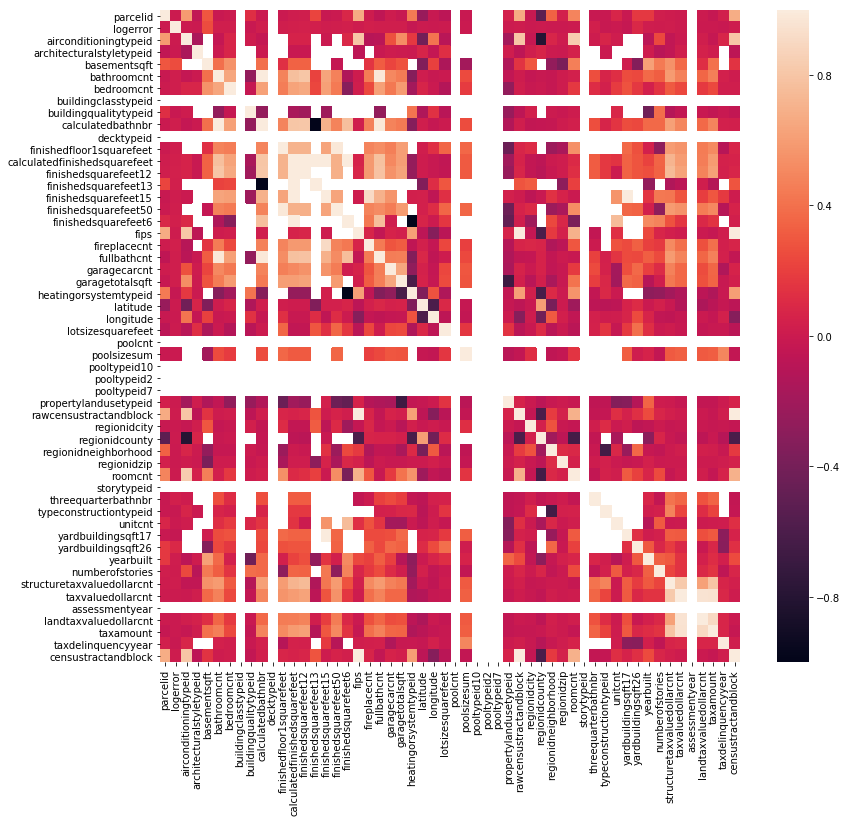

In [50]:
# Compute the correlation matrix
corr = merged2016.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 12))

# Draw the heatmap
sns.heatmap(corr)

1)regionidcounty is negtively correlated with Censustractandblock,fips,heatingorsystemtypeid,roomcnt, and rawcensustractandblock. So we can drop it.
2)buildingclasstypeid, decktypeid, poolcnt, pooltypeid10, pooltypeid2, pooltypeid7, storytypeid, and assessmentyear is positively correlated with all variables so we can remove all of them.
3)threequarterbathnbr can be removed because it is highly correlated with a lot of variables.
4) type 

In [51]:
# read new features and imputed files
train_data_2016 = pd.read_csv("C:/Users/Deepika Keswarap/Documents/projecta/all/featureengg/feature2016.csv")
# read train_data file
train_data_2017 = pd.read_csv("C:/Users/Deepika Keswarap/Documents/projecta/all/featureengg/feature2017.csv")

In [54]:
train_data_2017.columns

Index(['logerror', 'airconditioningtypeid', 'basementsqft', 'bathroomcnt',
       'bedroomcnt', 'buildingqualitytypeid', 'calculatedbathnbr',
       'decktypeid', 'calculatedfinishedsquarefeet', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'fips', 'fireplacecnt', 'garagecarcnt',
       'garagetotalsqft', 'hashottuborspa', 'heatingorsystemtypeid',
       'latitude', 'longitude', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum',
       'propertylandusetypeid', 'rawcensustractandblock', 'regionidcounty',
       'regionidzip', 'roomcnt', 'unitcnt', 'yardbuildingsqft17',
       'yardbuildingsqft26', 'numberofstories', 'fireplaceflag',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'landtaxvaluedollarcnt', 'taxdelinquencyflag', 'taxpercentage',
       'transaction_quarter', 'age', 'livingareaproportion', 'extraspace',
       'bedbathratio', 'avgroomsize', 'amenitiesscore', 'N-zip_count'],
      dtype='object')

taxvaluedollarcnt correlated with tax percentage
'heatingorsystemtypeid', 'airconditioningtypeid' with 'yardbuildingsqft26' and 'yardbuildingsqft17'